#EDA ON DATASET

In [ ]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santhoshakash","key":"9e201560476d1cd941400a1e0af22990"}'}

In [ ]:
# Create a directory for Kaggle
!mkdir -p ~/.kaggle

# Move the uploaded kaggle.json file to the Kaggle directory
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [ ]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = './creditcardfraud.zip'

# Specify the extraction path
extraction_path = './'

# Create a directory to extract the contents
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Optional: List the files in the extraction directory
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)

Extracted files: ['.config', 'kaggle.json', 'creditcardfraud.zip', 'creditcard.csv', 'sample_data']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [ ]:
# Load the dataset
file_path = "./creditcard.csv"
df = pd.read_csv(file_path)


# Get the shape of the dataset
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")


# Get the column names and their data types
print(df.dtypes)

The dataset contains 284807 rows and 31 columns.
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
# Check for missing or null values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
numerical_stats = df.describe()
numerical_stats

# Calculate descriptive statistics for the 'Amount' column
min_amount = df['Amount'].min()
max_amount = df['Amount'].max()
mean_amount = df['Amount'].mean()
median_amount = df['Amount'].median()

# Print the statistics
print(f"Minimum amount: {min_amount:.2f}")
print(f"Maximum amount: {max_amount:.2f}")
print(f"Mean amount: {mean_amount:.2f}")
print(f"Median amount: {median_amount:.2f}")

Minimum amount: 0.00
Maximum amount: 25691.16
Mean amount: 88.35
Median amount: 22.00


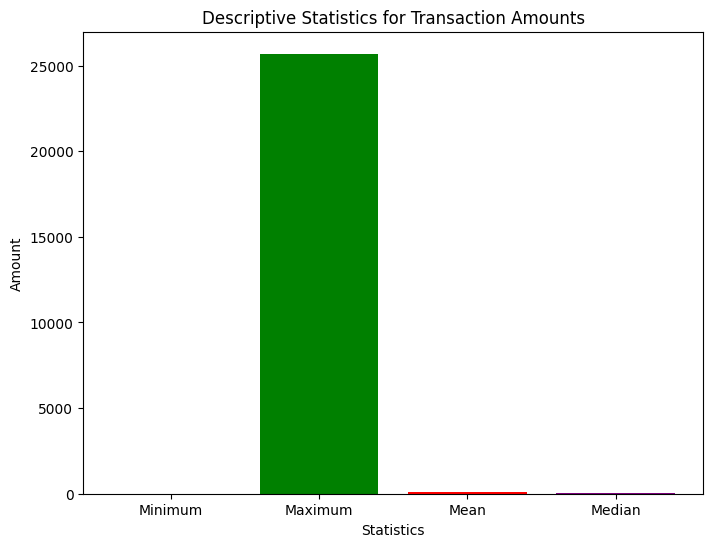

In [ ]:
# Data for plotting
import matplotlib.pyplot as plt

stats = ['Minimum', 'Maximum', 'Mean', 'Median']
values = [min_amount, max_amount, mean_amount, median_amount]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(stats, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Descriptive Statistics for Transaction Amounts')
plt.xlabel('Statistics')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Find the maximum transaction amount
max_amount = df['Amount'].max()
max_amount_row = df[df['Amount'] == max_amount]
is_fraudulent = max_amount_row['Class'].values[0]
print(f"The maximum transaction amount is {max_amount}, and it is {'fraudulent' if is_fraudulent else 'legitimate'}.")

The maximum transaction amount is 25691.16, and it is legitimate.


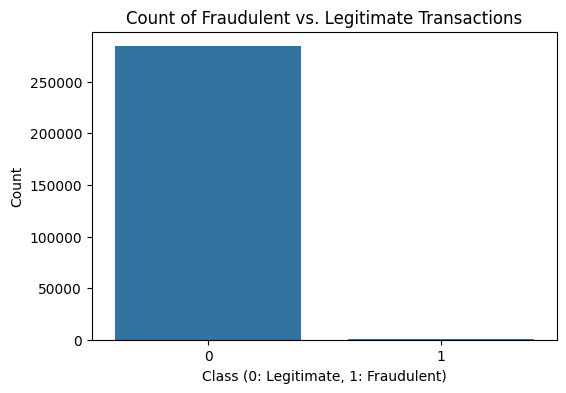

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Count of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

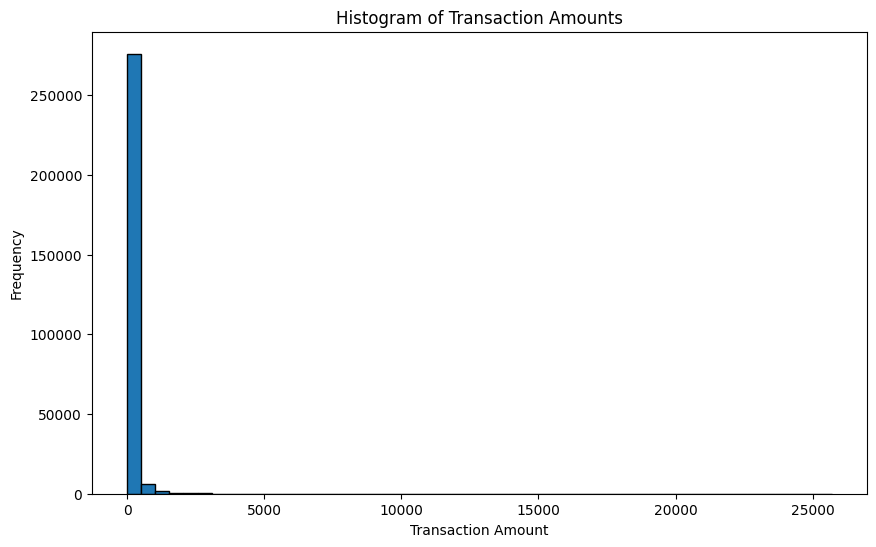

<ipython-input-12-c9d246b11551>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)


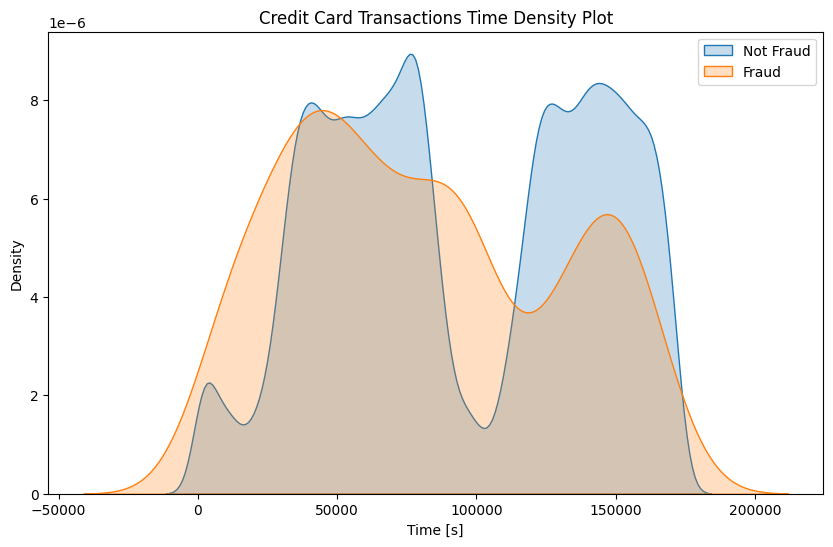

In [ ]:
# Create a histogram of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, edgecolor='k')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Ensure there are no infinite values in the 'Time' column
df['Time'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Splitting the data
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

# Creating a Seaborn KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', fill=True, common_norm=False)
sns.kdeplot(class_1, label='Fraud', fill=True, common_norm=False)

# Adding titles and labels
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()


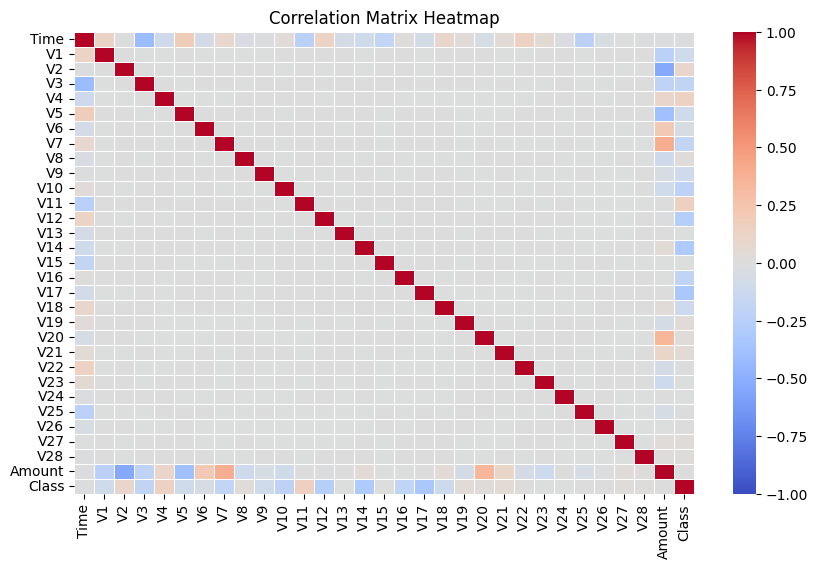

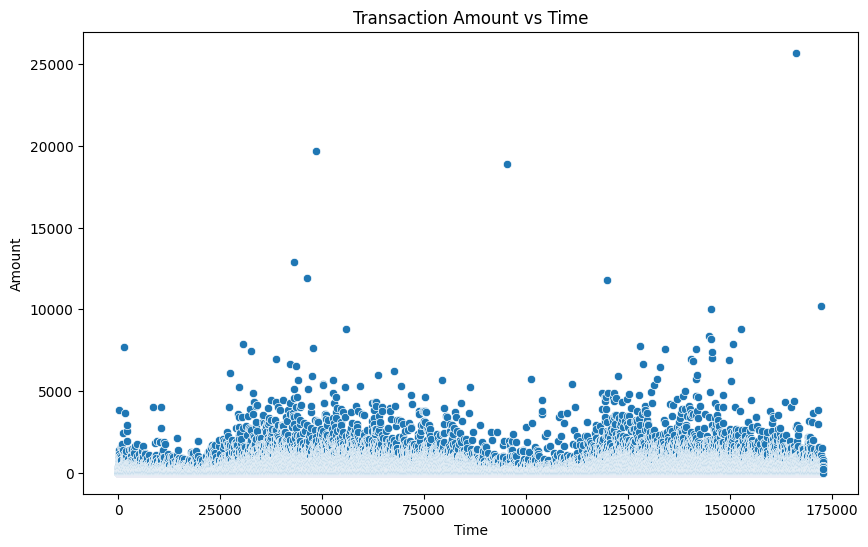

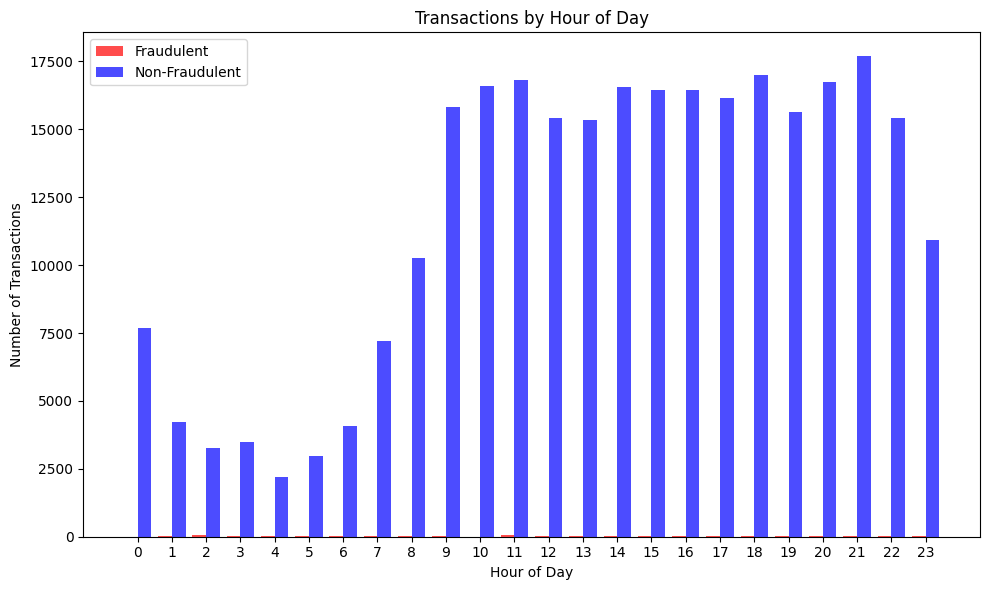

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter plot to visualize potential outliers in Amount vs Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=df)
plt.title('Transaction Amount vs Time')
plt.show()

# Convert the 'Time' column to hours
df['transaction_hour'] = (df['Time'] // 3600) % 24

# Assuming 'Class' column indicates fraudulent transactions (1 for fraud, 0 for non-fraud)
df['is_fraudulent'] = df['Class']

# Separate the fraudulent and non-fraudulent transactions
fraudulent_df = df[df['is_fraudulent'] == 1]
non_fraudulent_df = df[df['is_fraudulent'] == 0]

# Aggregate by hour for fraudulent and non-fraudulent transactions
fraudulent_by_hour = fraudulent_df.groupby('transaction_hour').size()
non_fraudulent_by_hour = non_fraudulent_df.groupby('transaction_hour').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_by_hour.index - 0.2, fraudulent_by_hour.values, width=0.4, color='red', alpha=0.7, label='Fraudulent')
plt.bar(non_fraudulent_by_hour.index + 0.2, non_fraudulent_by_hour.values, width=0.4, color='blue', alpha=0.7, label='Non-Fraudulent')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Hour of Day')
plt.xticks(range(0, 24))  # Set x-ticks for hours
plt.legend()
plt.tight_layout()
plt.show()

The hour with the most frequent fraudulent transactions is: 2.0:00
Number of fraudulent transactions during this hour: 57


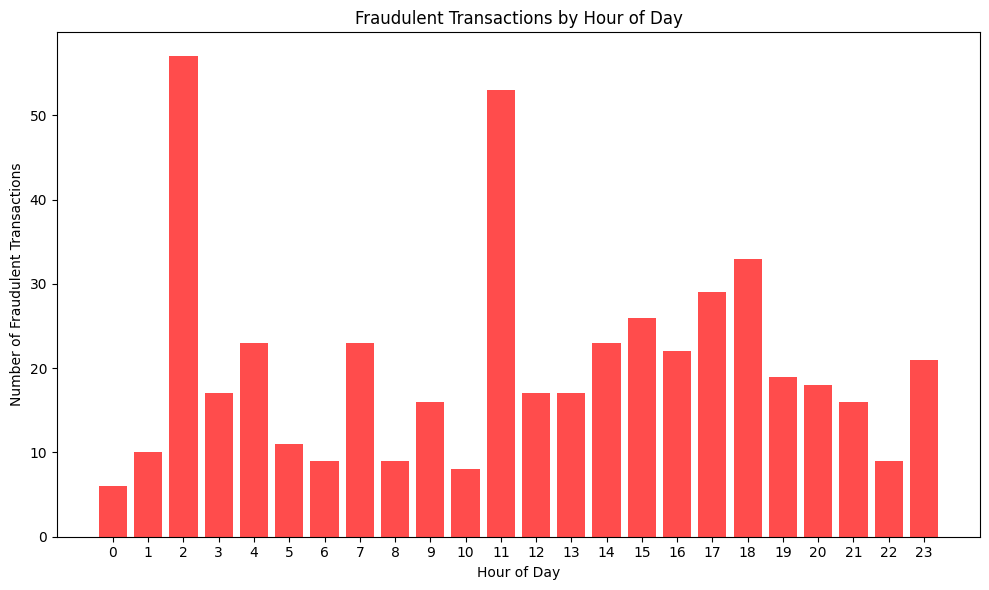

In [ ]:
# Convert the 'Time' column to hours
df['transaction_hour'] = (df['Time'] // 3600) % 24

# Assuming 'Class' column indicates fraudulent transactions (1 for fraud, 0 for non-fraud)
df['is_fraudulent'] = df['Class']

# Separate the fraudulent transactions
fraudulent_df = df[df['is_fraudulent'] == 1]

# Aggregate by hour for fraudulent transactions
fraudulent_by_hour = fraudulent_df.groupby('transaction_hour').size()

# Find the hour with the most frequent fraudulent transactions
most_frequent_hour = fraudulent_by_hour.idxmax()
most_frequent_count = fraudulent_by_hour.max()

# Print the result
print(f"The hour with the most frequent fraudulent transactions is: {most_frequent_hour}:00")
print(f"Number of fraudulent transactions during this hour: {most_frequent_count}")

# Plotting the distribution of fraudulent transactions by hour
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_by_hour.index, fraudulent_by_hour.values, color='red', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xticks(range(0, 24))  # Set x-ticks for hours
plt.tight_layout()
plt.show()

In [ ]:
# Convert the 'Time' column to hours
df['transaction_hour'] = (df['Time'] // 3600) % 24

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate required statistics for each hour
hourly_stats = df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()

# Rename columns for easier access
hourly_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']

# Separate fraudulent and non-fraudulent transactions
fraudulent_df = df[df['Class'] == 1]
non_fraudulent_df = df[df['Class'] == 0]

# Calculate required statistics for fraudulent transactions
fraudulent_stats = fraudulent_df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()
fraudulent_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']

# Calculate required statistics for non-fraudulent transactions
non_fraudulent_stats = non_fraudulent_df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()
non_fraudulent_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']

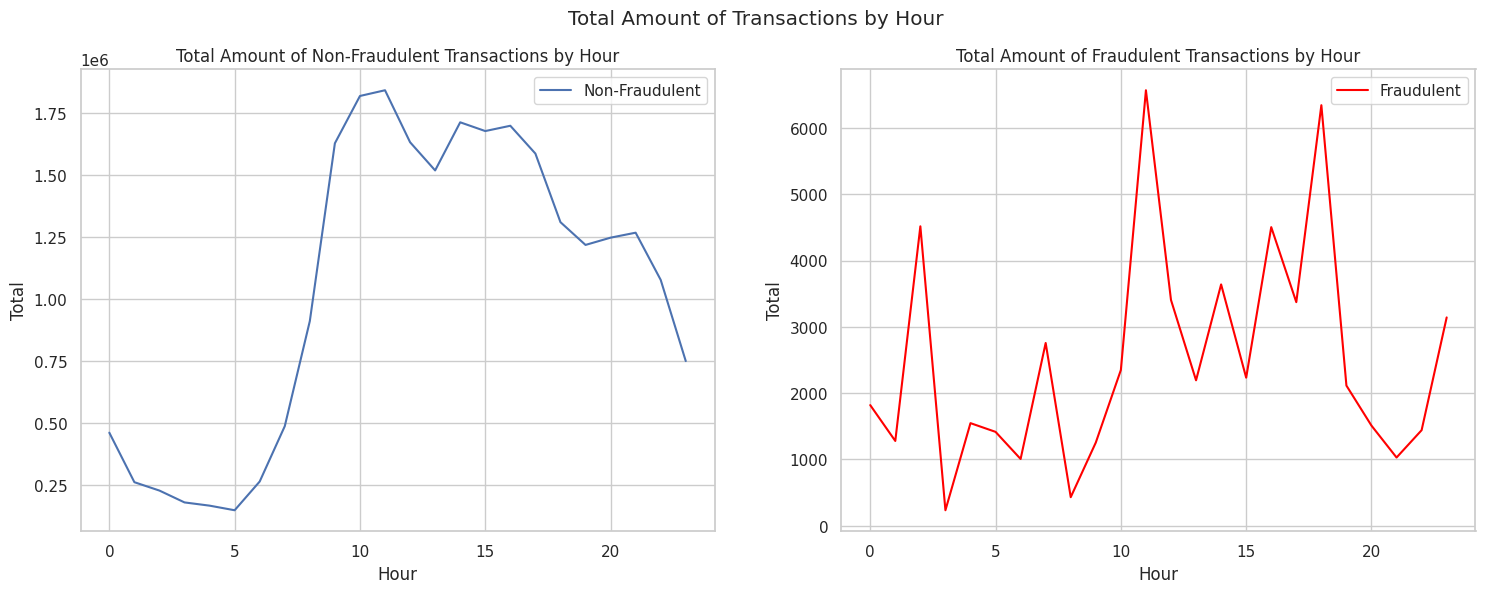

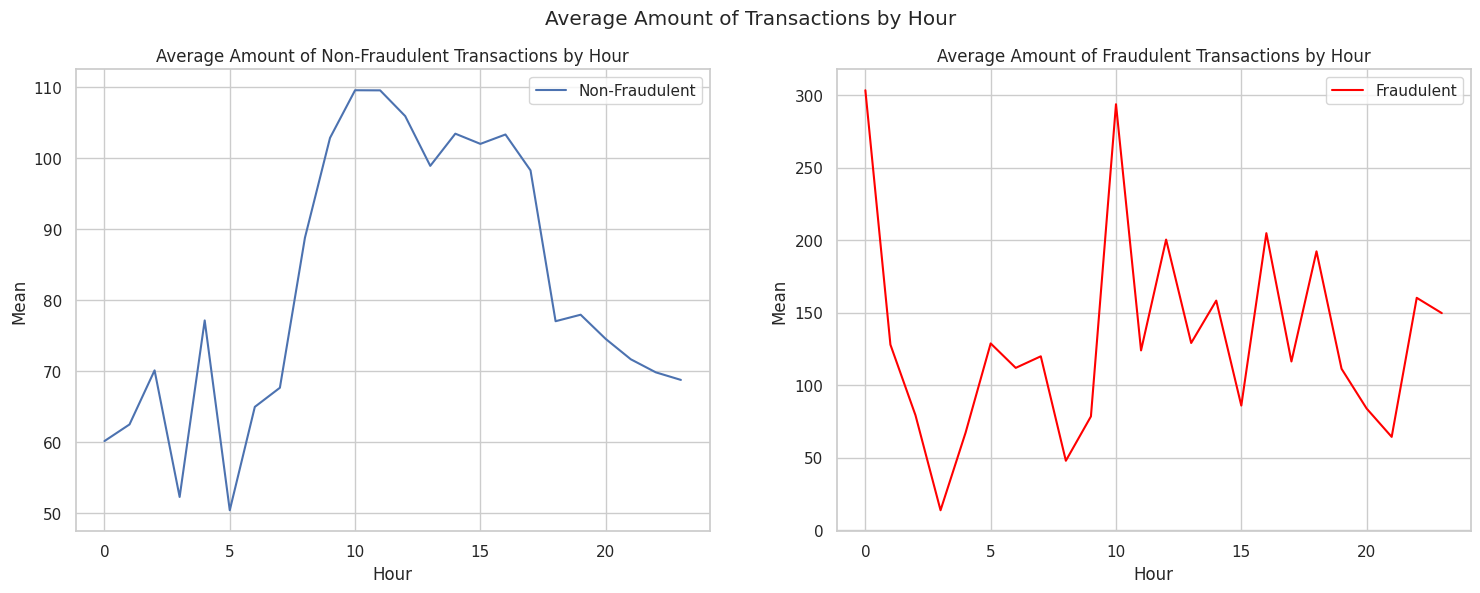

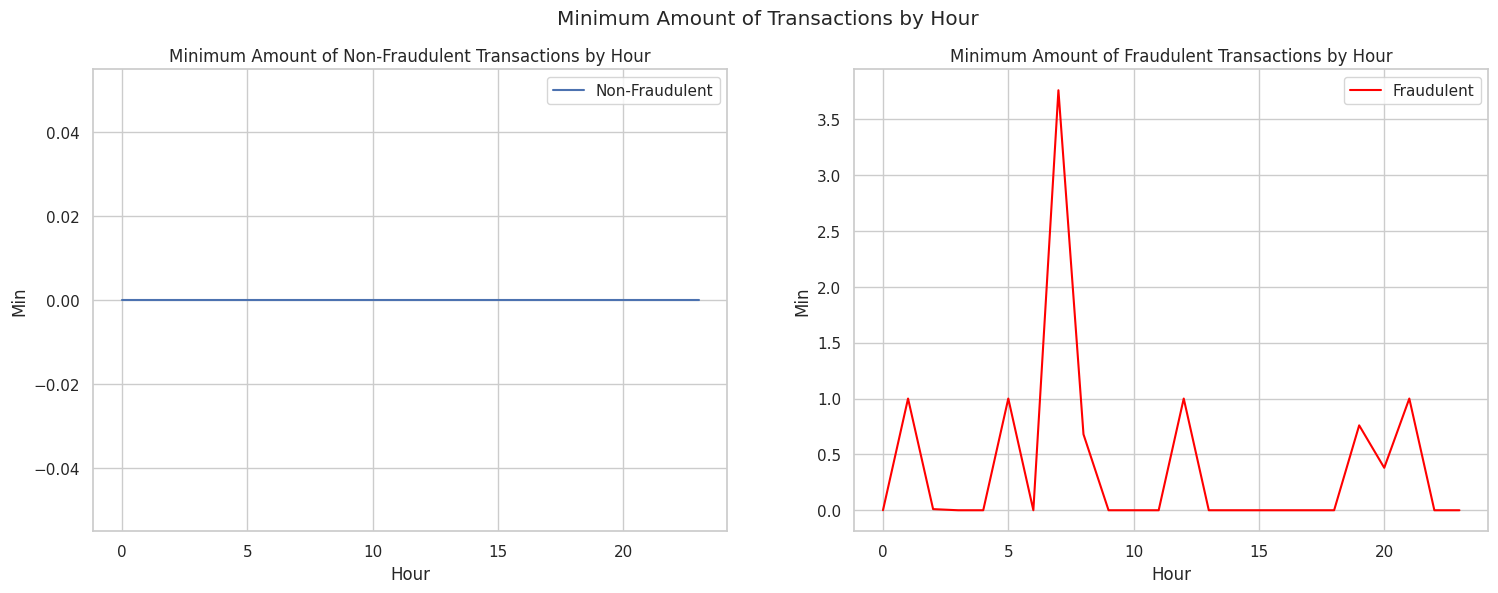

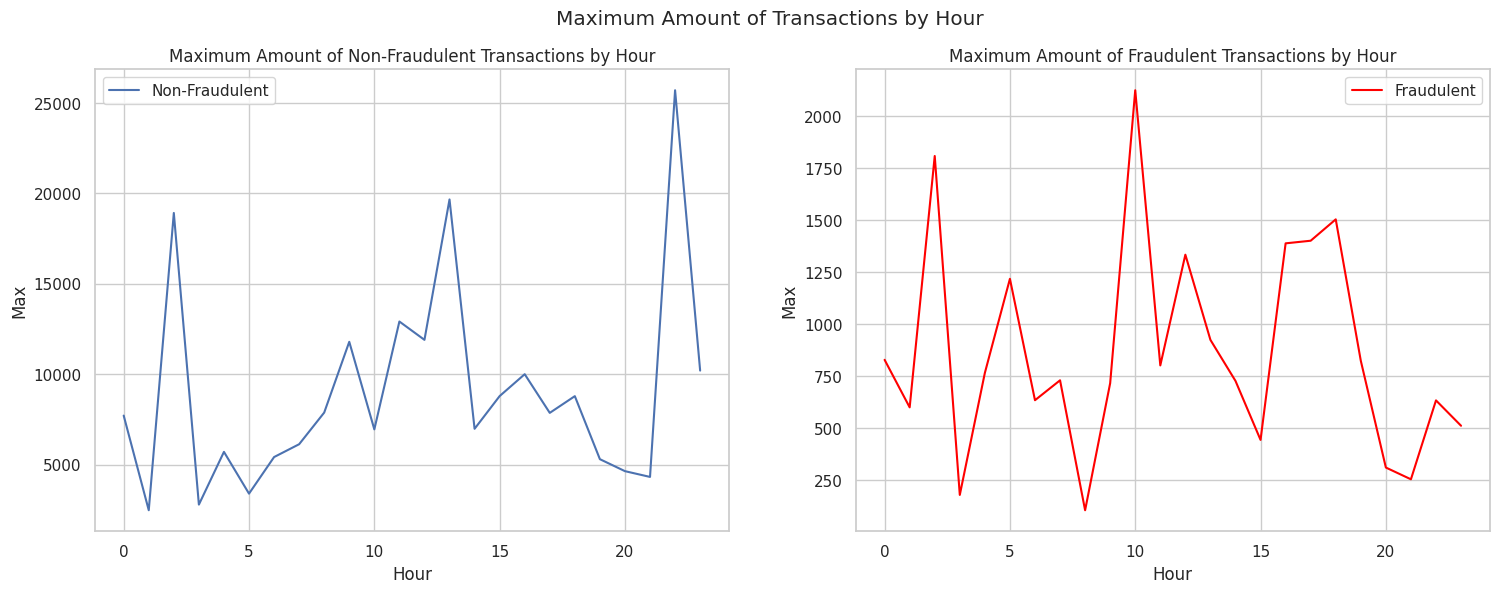

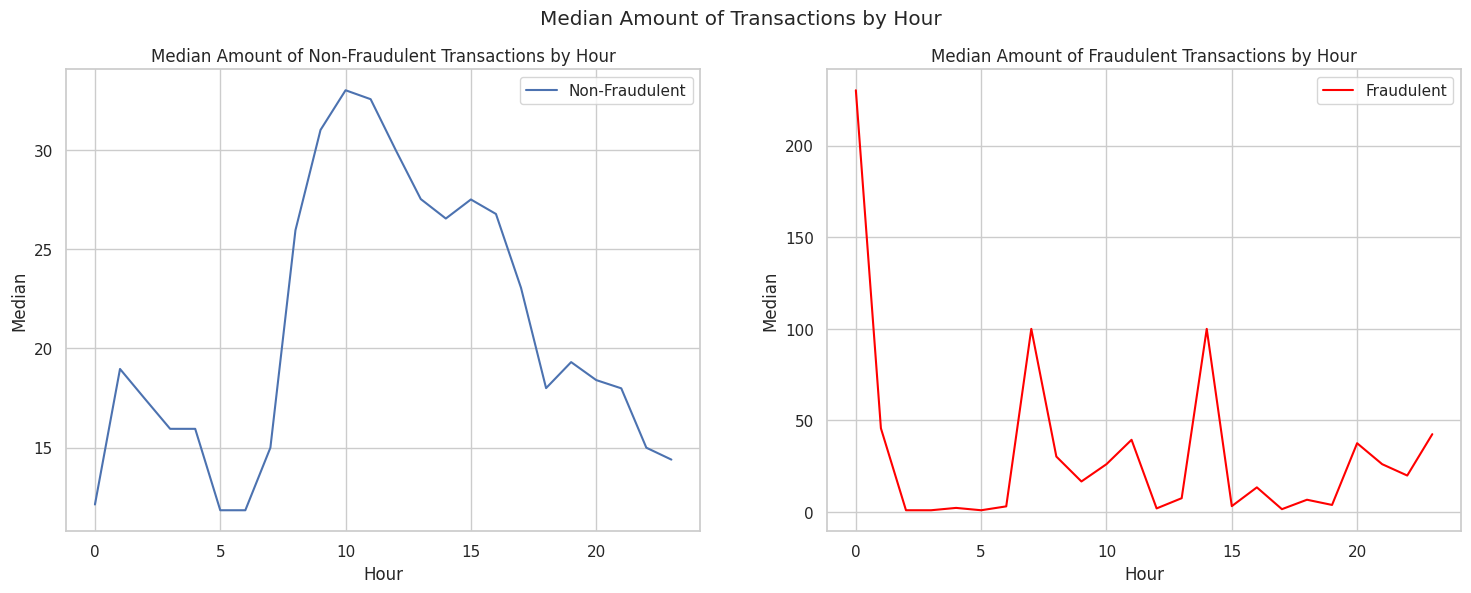

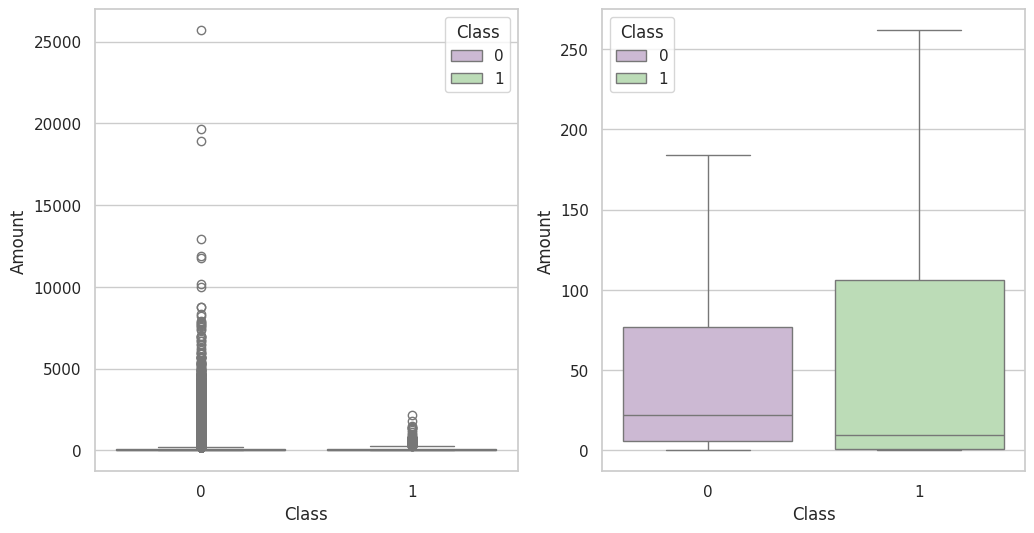

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot Total Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Total', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Total', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Total Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Total Amount of Fraudulent Transactions by Hour')
plt.suptitle('Total Amount of Transactions by Hour')
plt.show()

# Plot Average Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Mean', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Mean', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Average Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Average Amount of Fraudulent Transactions by Hour')
plt.suptitle('Average Amount of Transactions by Hour')
plt.show()

# Plot Minimum Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Min', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Min', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Minimum Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Minimum Amount of Fraudulent Transactions by Hour')
plt.suptitle('Minimum Amount of Transactions by Hour')
plt.show()

# Plot Maximum Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Max', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Max', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Maximum Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Maximum Amount of Fraudulent Transactions by Hour')
plt.suptitle('Maximum Amount of Transactions by Hour')
plt.show()

# Plot Median Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Median', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Median', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Median Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Median Amount of Fraudulent Transactions by Hour')
plt.suptitle('Median Amount of Transactions by Hour')
plt.show()


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

Non-Fraudulent Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


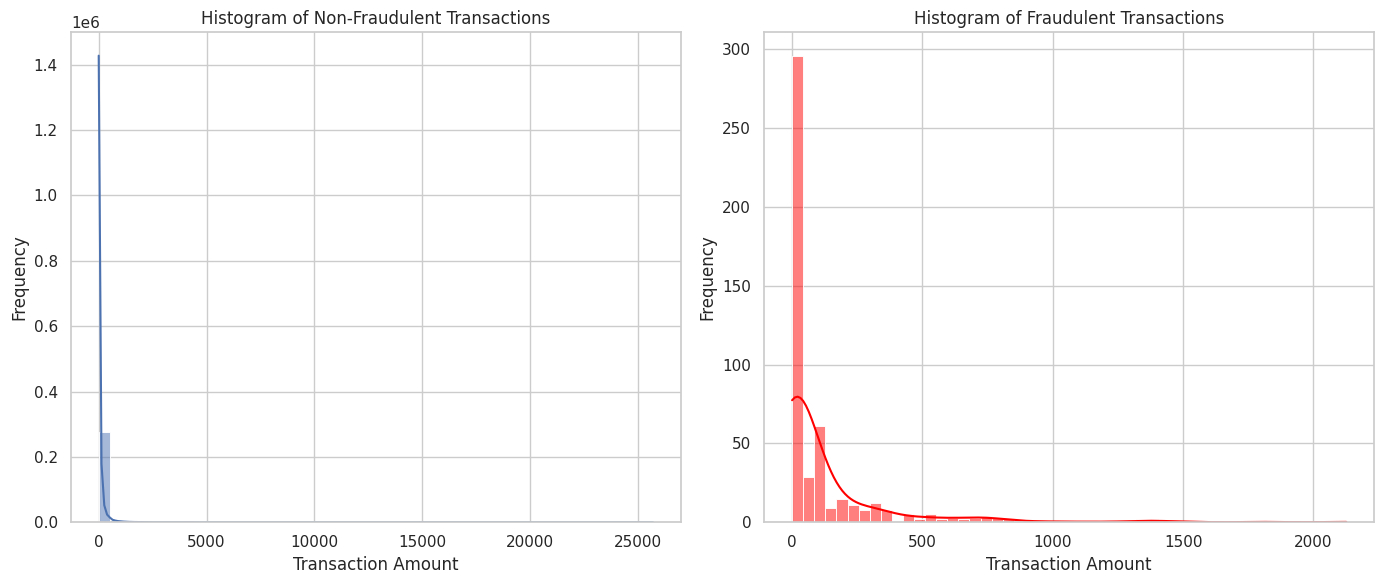

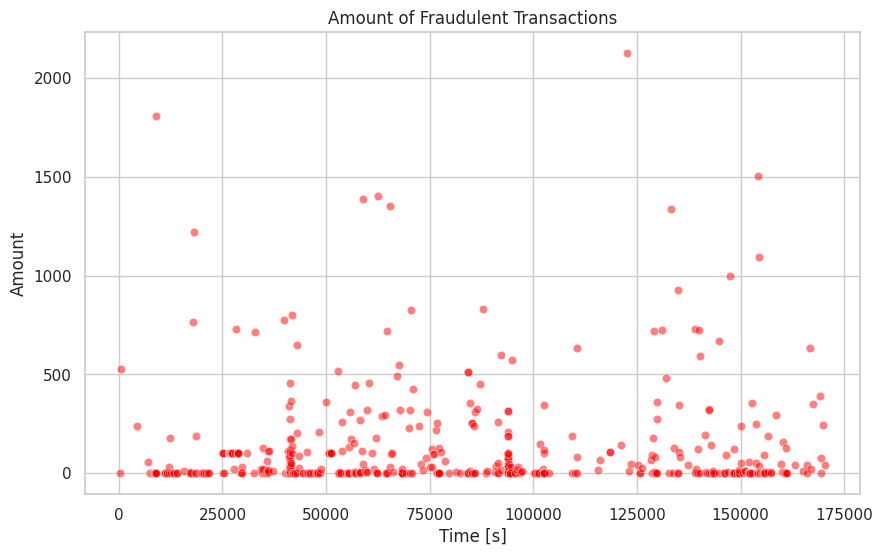

In [ ]:
# Create a temporary DataFrame with 'Amount' and 'Class' columns
tmp = df[['Amount', 'Class']].copy()

# Separate the data into non-fraudulent and fraudulent transactions
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

# Display summary statistics
print("Non-Fraudulent Transactions:")
print(class_0.describe())
print("\nFraudulent Transactions:")
print(class_1.describe())


# Plotting histograms
plt.figure(figsize=(14, 6))

# Histogram for non-fraudulent transactions
plt.subplot(1, 2, 1)
sns.histplot(class_0, bins=50, kde=True)
plt.title('Histogram of Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Histogram for fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(class_1, bins=50, kde=True, color='red')
plt.title('Histogram of Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Filter data for fraudulent transactions
fraud = df.loc[df['Class'] == 1]

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=fraud['Time'],
    y=fraud['Amount'],
    color='red',
    alpha=0.5
)

# Add titles and labels
plt.title('Amount of Fraudulent Transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')

# Display the plot
plt.show()

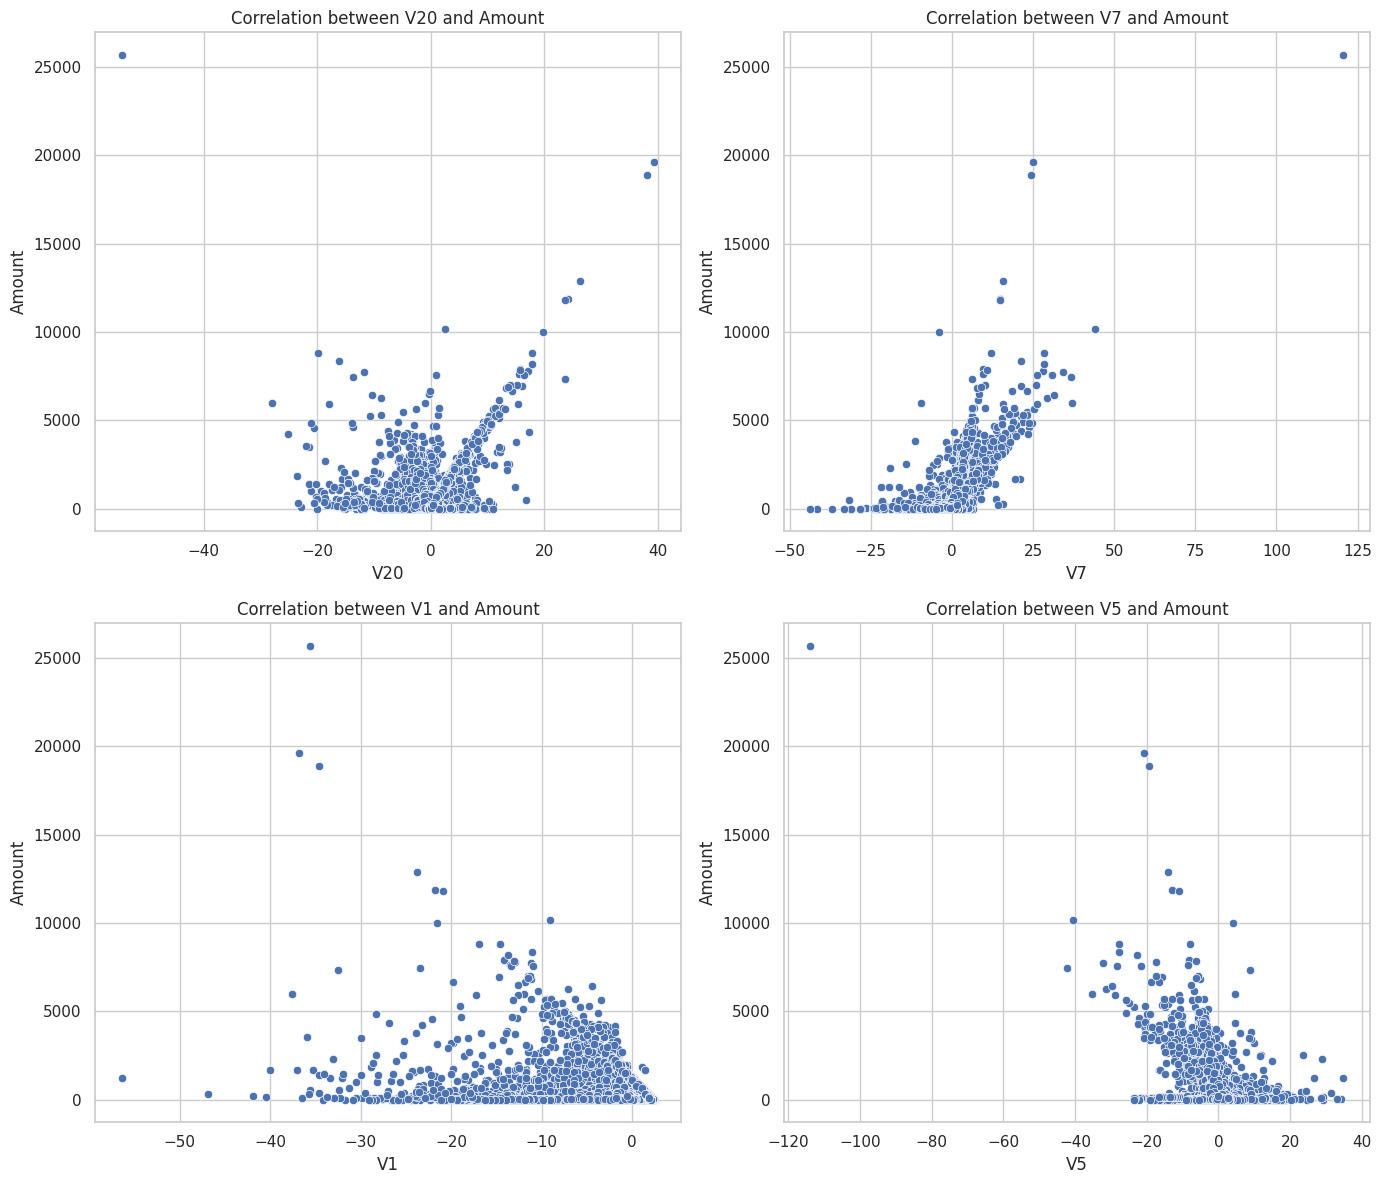

In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Plot the correlations
plt.figure(figsize=(14, 12))

# Plot the correlation between V20 and Amount
plt.subplot(2, 2, 1)
sns.scatterplot(x='V20', y='Amount', data=df)
plt.title('Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')

# Plot the correlation between V7 and Amount
plt.subplot(2, 2, 2)
sns.scatterplot(x='V7', y='Amount', data=df)
plt.title('Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')
# Plot the correlation between V1 and Amount
plt.subplot(2, 2, 3)
sns.scatterplot(x='V1', y='Amount', data=df)
plt.title('Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')

# Plot the correlation between V5 and Amount
plt.subplot(2, 2, 4)
sns.scatterplot(x='V5', y='Amount', data=df)
plt.title('Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()



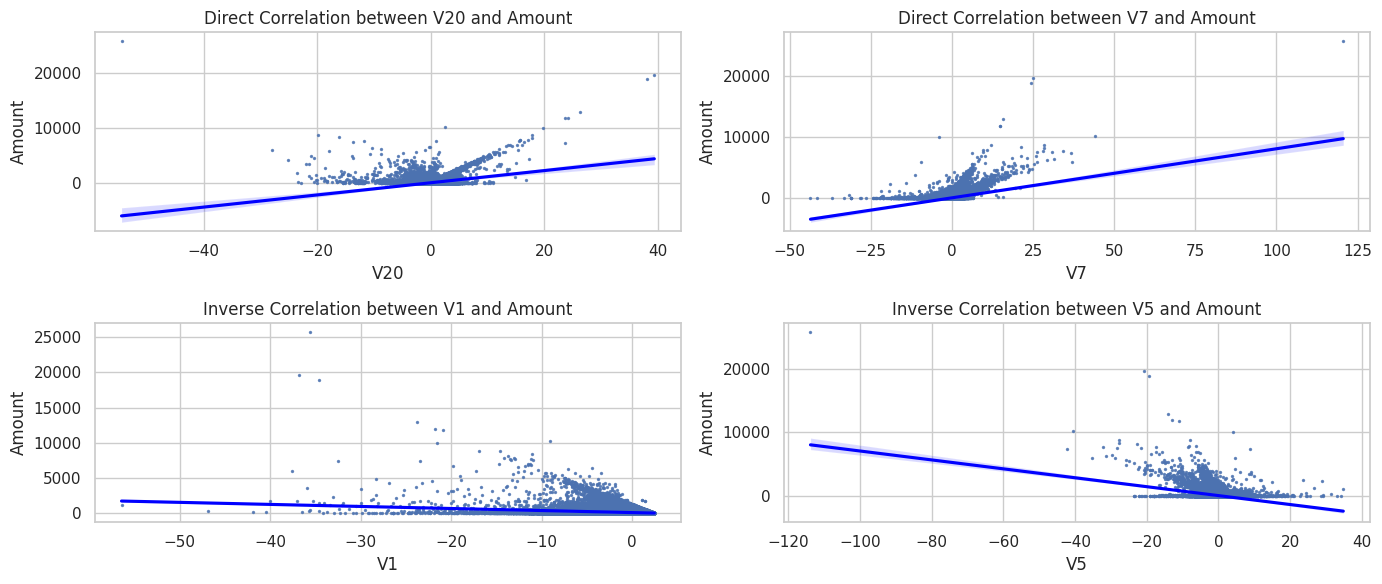

In [ ]:

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot the direct correlation between V20 and Amount
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.regplot(x='V20', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')

# Plot the direct correlation between V7 and Amount
plt.subplot(2, 2, 2)
sns.regplot(x='V7', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')

# Plot the inverse correlation between V1 and Amount
plt.subplot(2, 2, 3)
sns.regplot(x='V1', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')

# Plot the inverse correlation between V5 and Amount
plt.subplot(2, 2, 4)
sns.regplot(x='V5', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


#MODEL CREATION

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 97.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation
RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

RuntimeError: empty_like method already has a different docstring

In [ ]:
from sklearn.model_selection import train_test_split

# Define target and predictors
target = 'Class'
predictors = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
    'Amount'
]


##Random Forest

In [ ]:
clf = RandomForestClassifier(n_jobs=NO_JOBS,
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [ ]:
# Fill missing values in the target column with a constant (e.g., 0)
train_df[target] = train_df[target].fillna(0)  # You can change 0 to another value if needed
train_df[predictors] = train_df[predictors].fillna(train_df[predictors].mean())

# Fill missing values in the target column with 0 (or another constant)



# Train the classifier
clf.fit(train_df[predictors], train_df[target].values)

# Make predictions
preds = clf.predict(valid_df[predictors])

# Feature importance visualization
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize=(7,4))
plt.title('Feature Importance', fontsize=14)
s = sns.barplot(x='Feature', y='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Handle NaN values in y_true (valid_df[target])
valid_df[target] = valid_df[target].fillna(0)  # Replace 0 with mode()[0] if needed

# Compute confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True, ax=ax1,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# ✅ Ensure we use probability scores for ROC-AUC
prob_preds = clf.predict_proba(valid_df[predictors])[:, 1]  # Probability of Fraud (Class 1)

# Compute AUC-ROC score
auc_score = roc_auc_score(valid_df[target].values, prob_preds)
print(f"ROC-AUC Score: {auc_score:.4f}")


##AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

# Handle NaN values in predictors
train_df[predictors] = train_df[predictors].fillna(0)
valid_df[predictors] = valid_df[predictors].fillna(0)

# Train AdaBoost classifier
clf = AdaBoostClassifier(learning_rate=0.8, n_estimators=NUM_ESTIMATORS)
clf.fit(train_df[predictors], train_df[target].values)

# Make predictions
preds = clf.predict(valid_df[predictors])

# Compute AUC-ROC score (Use predict_proba instead of predict)
prob_preds = clf.predict_proba(valid_df[predictors])[:, 1]
auc_score = roc_auc_score(valid_df[target].values, prob_preds)

print(f"ROC-AUC Score: {auc_score:.4f}")


In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

##catboost

In [ ]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)
clf.fit(train_df[predictors], train_df[target].values,verbose=True)
preds = clf.predict(valid_df[predictors])
roc_auc_score(valid_df[target].values, preds)

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


##XGBoost

In [ ]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [ ]:
model = xgb.train(params,
                dtrain,
                MAX_ROUNDS,
                watchlist,
                early_stopping_rounds=EARLY_STOP,
                maximize=True,
                verbose_eval=VERBOSE_EVAL)
preds = model.predict(dtest)
rocc = roc_auc_score(test_df[target].values, preds)
print("The AUC score for the prediction of fresh data (test set) is ",rocc )

##OTHER


###MLP deep learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[predictors])
X_valid_scaled = scaler.transform(valid_df[predictors])
X_test_scaled = scaler.transform(test_df[predictors])  # Scale the test set

# Build Neural Network
model = Sequential([
    Dense(128, activation='relu', input_dim=len(predictors)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(X_train_scaled, train_df[target], validation_data=(X_valid_scaled, valid_df[target]), epochs=10, batch_size=32)

# Predict probabilities on validation set
y_valid_probs = model.predict(X_valid_scaled).flatten()
y_valid_preds = (y_valid_probs > 0.5).astype(int)

# Evaluate on validation set
roc_auc_valid = roc_auc_score(valid_df[target], y_valid_probs)
print(f"\n--- Neural Network - Validation Set ---")
print("ROC-AUC Score:", roc_auc_valid)
print(classification_report(valid_df[target], y_valid_preds))

# Plot ROC Curve for validation set
fpr_valid, tpr_valid, _ = roc_curve(valid_df[target], y_valid_probs)
plt.figure()
plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_valid:.2f}) - Validation')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc="lower right")
plt.show()

# Predict probabilities on test set
y_test_probs = model.predict(X_test_scaled).flatten()
y_test_preds = (y_test_probs > 0.5).astype(int)

# Evaluate on test set
roc_auc_test = roc_auc_score(test_df[target], y_test_probs)
print(f"\n--- Neural Network - Test Set ---")
print("ROC-AUC Score:", roc_auc_test)
print(classification_report(test_df[target], y_test_preds))

# Plot ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(test_df[target], y_test_probs)
plt.figure()
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f}) - Test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc="lower right")
plt.show()

###LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier(
    learning_rate=0.05,
    n_estimators=500,
    scale_pos_weight=10,  # Adjust for imbalanced classes
    random_state=42
)

# Train the model
lgb_clf.fit(train_df[predictors], train_df[target])

# Evaluate on validation set
y_valid_probs = lgb_clf.predict_proba(valid_df[predictors])[:, 1]
y_valid_preds = lgb_clf.predict(valid_df[predictors])

roc_auc_valid = roc_auc_score(valid_df[target], y_valid_probs)
print("\n--- LightGBM - Validation Set ---")
print("ROC-AUC Score:", roc_auc_valid)
print(classification_report(valid_df[target], y_valid_preds))

# Plot ROC Curve for validation set
fpr_valid, tpr_valid, _ = roc_curve(valid_df[target], y_valid_probs)
plt.figure()
plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_valid:.2f}) - Validation')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc="lower right")
plt.show()

# Evaluate on test set
y_test_probs = lgb_clf.predict_proba(test_df[predictors])[:, 1]
y_test_preds = lgb_clf.predict(test_df[predictors])

roc_auc_test = roc_auc_score(test_df[target], y_test_probs)
print("\n--- LightGBM - Test Set ---")
print("ROC-AUC Score:", roc_auc_test)
print(classification_report(test_df[target], y_test_preds))

# Plot ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(test_df[target], y_test_probs)
plt.figure()
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f}) - Test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib

# Check which variable names are defined
print(globals().keys())

# Save only if the variable exists
if 'clf' in globals():
    joblib.dump(clf, "adaboost.pkl")
if 'random_forest_clf' in globals():
    joblib.dump(random_forest_clf, "random_forest.pkl")
if 'catboost_clf' in globals():
    joblib.dump(catboost_clf, "catboost.pkl")
if 'xgb_model' in globals():
    joblib.dump(xgb_model, "xgboost.pkl")
if 'lgb_clf' in globals():
    joblib.dump(lgb_clf, "lightgbm.pkl")
if 'mlp_model' in globals():
    joblib.dump(mlp_model, "mlp.pkl")



In [ ]:
import joblib, xgboost as xgb, lightgbm as lgb, pandas as pd, numpy as np, time, tensorflow as tf
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# -------------------------
# Load and preprocess dataset
# -------------------------
df = pd.read_csv("creditcard.csv")  # Change dataset if needed

target = 'Class'
predictors = [col for col in df.columns if col != target]

df[predictors] = df[predictors].fillna(0)
df[target] = df[target].fillna(0)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

# -------------------------
# Define Models
# -------------------------
models = {
    "random_forest.pkl": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "adaboost.pkl": AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42),
    "catboost.pkl": CatBoostClassifier(iterations=500, learning_rate=0.02, depth=12, random_seed=42, verbose=False, task_type="GPU"),
    "xgboost.pkl": xgb.XGBClassifier(n_estimators=1000, learning_rate=0.039, max_depth=2, subsample=0.8, colsample_bytree=0.9, eval_metric='auc', random_state=42, device="cuda"),
    "lightgbm.pkl": lgb.LGBMClassifier(learning_rate=0.05, n_estimators=500, scale_pos_weight=10, random_state=42, device="cpu")  # LightGBM forced to use CPU
}

# -------------------------
# Train & Save Models
# -------------------------
trained_models = {}  # Store trained models

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(train_df[predictors], train_df[target])
    trained_models[name] = model
    joblib.dump(model, name)
    print(f"✅ Model saved: {name}")

# -------------------------
# Train & Save MLP Model
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[predictors])
X_test_scaled = scaler.transform(test_df[predictors])

mlp_model = Sequential([
    Dense(128, activation='relu', input_dim=len(predictors)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

print("Training MLP model...")
mlp_model.fit(X_train_scaled, train_df[target], epochs=10, batch_size=64, verbose=1)
mlp_model.save("mlp.h5")
print("✅ MLP model saved!")

# -------------------------
# Evaluate Models
# -------------------------
results = []

# Evaluate all trained models
for model_name, model in trained_models.items():
    predictions = model.predict(test_df[predictors])

    accuracy = accuracy_score(test_df[target], predictions)
    precision = precision_score(test_df[target], predictions)
    recall = recall_score(test_df[target], predictions)
    f1 = f1_score(test_df[target], predictions)
    auc = roc_auc_score(test_df[target], predictions)

    results.append([model_name, accuracy, precision, recall, f1, auc])

# Evaluate MLP Model
from tensorflow.keras.models import load_model
mlp_model = load_model("mlp.h5")
mlp_predictions = (mlp_model.predict(test_df[predictors]) > 0.5).astype(int).flatten()

accuracy = accuracy_score(test_df[target], mlp_predictions)
precision = precision_score(test_df[target], mlp_predictions)
recall = recall_score(test_df[target], mlp_predictions)
f1 = f1_score(test_df[target], mlp_predictions)
auc = roc_auc_score(test_df[target], mlp_predictions)

results.append(["MLP (Deep Learning)", accuracy, precision, recall, f1, auc])

# -------------------------
# Generate Excel Report
# -------------------------
def generate_excel(results):
    df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])
    df.to_excel("model_results.xlsx", index=False)
    print(f"✅ Excel report saved as 'model_results.xlsx'!")

generate_excel(results)

# -------------------------
# Download Trained Models & Excel Report (For Colab Users)
# -------------------------
try:
    from google.colab import files
    print("Downloading trained models...")
    for filename in trained_models.keys():
        files.download(filename)
    files.download("mlp.h5")
    files.download("model_results.xlsx")
except:
    print("Download available only in Google Colab")

print("✅ All models trained, evaluated, saved, and exported successfully! 🚀")


In [ ]:
import joblib

# List of trained models
trained_models = {
    "random_forest.pkl": random_forest_clf,
    "adaboost.pkl": adaboost_clf,
    "catboost.pkl": catboost_clf,
    "xgboost.pkl": xgb_model,
    "lightgbm.pkl": lgb_clf
}

# Save each model


In [ ]:
!pip install lightgbm --no-cache-dir


In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


In [ ]:
!pip install lightgbm --no-cache-dir --prefer-binary --install-option=--gpu



In [ ]:
!sudo apt install ocl-icd-opencl-dev
!sudo apt install clinfo


In [ ]:
import numpy as np
import pandas as pd
import joblib
import time
import tensorflow as tf
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import load_model

# -------------------------
# Load Dataset
# -------------------------
df = pd.read_csv("creditcard.csv")  # Change if using another dataset

target = 'Class'
predictors = [col for col in df.columns if col != target]

df[predictors] = df[predictors].fillna(0)
df[target] = df[target].fillna(0)

# Prepare Data
X = df[predictors]
y = df[target]

# -------------------------
# Load Saved Models
# -------------------------
model_filenames = ["random_forest.pkl", "adaboost.pkl", "catboost.pkl", "xgboost.pkl", "lightgbm.pkl"]
loaded_models = {}

for filename in model_filenames:
    try:
        loaded_models[filename] = joblib.load(filename)
        print(f"✅ Loaded model: {filename}")
    except FileNotFoundError:
        print(f"❌ Model file not found: {filename}")

# Load MLP (Deep Learning) Model
try:
    mlp_model = load_model("mlp.h5")
    print("✅ Loaded Deep Learning model: mlp.h5")
except FileNotFoundError:
    print("❌ MLP model file not found!")

# -------------------------
# Set Up Cross-Validation
# -------------------------
n_splits = 3
n_repeats = 1
random_state = 42
rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# -------------------------
# Initialize Results Containers
# -------------------------
cv_results_all = []
cv_summary = []
inference_times = {}
training_times = {}
model_params = {}
feature_importances = {}

# -------------------------
# Evaluate Each Model
# -------------------------
for model_name, model in loaded_models.items():
    print(f"🔍 Evaluating {model_name}...")

    # Save Model Parameters
    model_params[model_name] = model.get_params()

    # Measure Training Time
    start_train = time.time()
    model.fit(X, y)  # Fit on entire dataset for profiling
    training_times[model_name] = time.time() - start_train

    # Measure Inference Time
    start_infer = time.time()
    _ = model.predict(X)
    inference_times[model_name] = time.time() - start_infer

    # Perform Cross-Validation
    scores = cross_validate(model, X, y, scoring=scoring, cv=rkf, n_jobs=-1, return_train_score=False)
    n_folds = len(scores['test_accuracy'])

    df_raw = pd.DataFrame({
        'Model': [model_name] * n_folds,
        'Fold': np.arange(1, n_folds + 1),
        'Accuracy': scores['test_accuracy'],
        'Precision_macro': scores['test_precision_macro'],
        'Recall_macro': scores['test_recall_macro'],
        'F1_macro': scores['test_f1_macro']
    })
    cv_results_all.append(df_raw)

    # Summarize Cross-Validation Results
    summary = {
        'Model': model_name,
        'Mean_Accuracy': np.mean(scores['test_accuracy']),
        'Std_Accuracy': np.std(scores['test_accuracy']),
        'Mean_Precision_macro': np.mean(scores['test_precision_macro']),
        'Std_Precision_macro': np.std(scores['test_precision_macro']),
        'Mean_Recall_macro': np.mean(scores['test_recall_macro']),
        'Std_Recall_macro': np.std(scores['test_recall_macro']),
        'Mean_F1_macro': np.mean(scores['test_f1_macro']),
        'Std_F1_macro': np.std(scores['test_f1_macro'])
    }
    cv_summary.append(summary)

    # Feature Importances (for tree-based models)
    if hasattr(model, "feature_importances_"):
        feature_importances[model_name] = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

print("✅ All machine learning models evaluated!")

# -------------------------
# Evaluate Deep Learning Model
# -------------------------
if 'mlp_model' in locals():
    print("🔍 Evaluating MLP (Deep Learning)...")

    # Measure Inference Time
    start_infer = time.time()
    mlp_predictions = (mlp_model.predict(X) > 0.5).astype(int).flatten()
    inference_times["MLP (Deep Learning)"] = time.time() - start_infer

    # Compute Metrics
    accuracy = accuracy_score(y, mlp_predictions)
    precision = precision_score(y, mlp_predictions)
    recall = recall_score(y, mlp_predictions)
    f1 = f1_score(y, mlp_predictions)
    auc = roc_auc_score(y, mlp_predictions)

    # Append Results
    cv_summary.append({
        'Model': "MLP (Deep Learning)",
        'Mean_Accuracy': accuracy,
        'Std_Accuracy': 0,  # No CV for MLP
        'Mean_Precision_macro': precision,
        'Std_Precision_macro': 0,
        'Mean_Recall_macro': recall,
        'Std_Recall_macro': 0,
        'Mean_F1_macro': f1,
        'Std_F1_macro': 0
    })

print("✅ MLP model evaluated!")

# -------------------------
# Save Results to Excel
# -------------------------
df_cv_raw = pd.concat(cv_results_all, ignore_index=True)
df_cv_summary = pd.DataFrame(cv_summary)
df_inference = pd.DataFrame({
    'Model': list(inference_times.keys()),
    'Inference_Time_Seconds': list(inference_times.values())
})
df_training = pd.DataFrame({
    'Model': list(training_times.keys()),
    'Training_Time_Seconds': list(training_times.values())
})
df_params = pd.DataFrame.from_dict(model_params, orient='index')

excel_filename = "model_detailed_results.xlsx"
with pd.ExcelWriter(excel_filename) as writer:
    df_cv_raw.to_excel(writer, sheet_name="CV_Raw_Scores", index=False)
    df_cv_summary.to_excel(writer, sheet_name="CV_Summary", index=False)
    df_inference.to_excel(writer, sheet_name="Inference_Times", index=False)
    df_training.to_excel(writer, sheet_name="Training_Times", index=False)
    df_params.to_excel(writer, sheet_name="Model_Params")

    for model_name, df_imp in feature_importances.items():
        df_imp.to_excel(writer, sheet_name=f"{model_name}_FeatureImp", index=False)

print(f"📊 All detailed results saved to {excel_filename}!")

# -------------------------
# Download Excel Report (For Colab Users)
# -------------------------
try:
    from google.colab import files
    files.download(excel_filename)
except:
    print("Download available only in Google Colab")

print("✅ All models evaluated, and results saved successfully! 🚀")


❌ Model file not found: random_forest.pkl
❌ Model file not found: adaboost.pkl
❌ Model file not found: catboost.pkl
❌ Model file not found: xgboost.pkl
❌ Model file not found: lightgbm.pkl
❌ MLP model file not found!
✅ All machine learning models evaluated!
✅ MLP model evaluated!


ValueError: No objects to concatenate